# Network Analytics Homework 2

### Group G: Joanna Andari, Karim Awad, Jiye Ren, Nirbhay Sharma, Qiuyue Zhang, Xiaoyan Zhou

### TABLE OF CONTENTS

**A] [PROGRAMMING QUESTIONS](#PROGRAMMING)**                  
**1. [QUESTION 1 - Who Talks to Whom](#QUESTION-1)**                              
**2. [QUESTION 2 - Djibouti Travelling Sales Problem](#QUESTION-2)**                       
**2(a). [QUESTION 2(a) - Plot the cities](#Q2---PART-A)**                   
**2(c). [QUESTION 2(c) - Challenge Question GUROBI](#Q2---PART-C)**                   
**2(d). [QUESTION 2(d) - Plotting the optimal tour for TSP](#Q2---PART-D)**                   


**B] [THEORY QUESTIONS](#THEORY)**                  
**3. [QUESTION 3 - Greedy Algorithm proofs](#QUESTION-3)**                              
**4. [QUESTION 4 - Flow Problem](#QUESTION-4)**                 
**4(a). [QUESTION 4(a) - Formulate as Linear Problem](#Q4---PART-A)**                   
**4(b). [QUESTION 4(b) - Formulate Dual](#Q4---PART-B)**                   
**4(c). [QUESTION 4(c) - Solve using Linear Programming](#Q4---PART-C)**                   
**4(d). [QUESTION 4(d) - Define s-t cut](#Q4---PART-D)**                   
    

## PROGRAMMING

### QUESTION 1   
##### (5 points) 
**(You will get the data for this on 25 Nov 2017 8PM): The data collected will invariably be fraught with problems. We proceed nevertheless. Use built-in functions in NetworkX on the data HW2_ who_talks_to_whom.txt to do an organizational network analysis report (1 page max)---essentially calculating centrality measures (try at least one eigenvalue based one) and clustering coefficients and gaining some insight into the network. The objective for me (your client) is to identify who are the leaders and opinion-makers in your cohort.**

**ANSWER)**                
Please go through the full report of the analysis of the network analysis produced based on the who_talks_to_whom.txt file is attached in the zip file of the submission. Alternatively, here is a link to the report for your reference:
<a href = "https://github.com/Karim01982/preparation/blob/master/Autumn_term/Network%20Analytics/HW2/Submission/Programming1/Group_G_Programming1_Report.pdf">Click to view the report on GitHub</a>

The following are the explanations for the code below:
1. As explained in the report, the raw data “Sent” and “Received” matrix are very similar - the number of conversation started by each side in a pair are quite balanced, which limited the information we could read from an unbalanced directed network. Thus we only use the averaged conversation data to analyse the social network as there is a length limit;
2. The graphs generated each time will be slightly different as we did not set random seeds for the layout. However the other characeristics will stay the same;
3. Some functions we used only works properly (as the way we use it in the following code) in some Python 3.X.

*NOTE: The code below is the one that produces some of the elements (graphs, numbers, etc.) included in the final report. For more detailed analysis please see the Network_Analytics_HW2_Programming_1_code_full.py file.*


In [1]:
from pandas import Series, DataFrame
import pandas as pd
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from functools import reduce
import collections
import seaborn as sns 

In [12]:
# Part 1: Data Cleaning & Drawing
data = 'https://raw.githubusercontent.com/Karim01982/preparation/master/Autumn_term/Network%20Analytics/HW2/Data/HW2_who_talks_to_whom_avg.csv'
avg_mat = pd.read_csv(data)

# create node list
node_no_dict = {i:str(i+1) for i in list(range(81))}

avg_node_list = list()
for i in list(range(81)):
    for j in list(range(81)):
        if avg_mat.iloc[i, j] != 0:
            avg_node_list.append([node_no_dict[i], node_no_dict[j], avg_mat.iloc[i, j]])

# create DiGraph
G_total = nx.DiGraph()
G_total.add_weighted_edges_from(avg_node_list)

# draw the graphs
# total (weight > k)
k_total = 0

node_color_vec_total = dict()
for key in G_total.nodes():
    if len(G_total.neighbors(key)) >= np.percentile([len(G_total.neighbors(i)) for i in G_total.nodes()], 90):
        node_color_vec_total[key] = 'r'
    elif len(G_total.neighbors(key)) >= np.percentile([len(G_total.neighbors(i)) for i in G_total.nodes()], 75):
        node_color_vec_total[key] = 'hotpink'
    else:
        node_color_vec_total[key] = 'pink'

data_total = {'edgelist': [avg_node_list[i] for i in list(range(2057))],
              'tail': [avg_node_list[i][0] for i in list(range(2057))],
              'head': [avg_node_list[i][1] for i in list(range(2057))],
              'weight': [avg_node_list[i][2] for i in list(range(2057))],
              'num_neighbor': [len(G_total.neighbors(i[0])) for i in avg_node_list],
              'color': [node_color_vec_total[i[0]] for i in avg_node_list]}
node_attr_total = DataFrame(data_total)

node_attr_total_draw = DataFrame(columns = ['edgelist', 'tail', 'head', 'weight', 'num_neighbor', 'color'])
for i in list(range(2057)):
    if node_attr_total['weight'][i] > k_total:
        node_attr_total_draw = node_attr_total_draw.append(node_attr_total.loc[i], ignore_index=True)

nx.draw(G_total, 
        pos = nx.spring_layout(G_total, k = 0.6, iterations = 85, scale = 900),
        # pos = nx.random_layout(G_total),
        edgelist = list(node_attr_total_draw['edgelist']),
        with_labels = True,
        node_size = [(len(G_total.neighbors(i)) - 2) * 35 for i in G_total.nodes()],
        node_color = list(node_color_vec_total.values()),
        edge_color = 'darkgrey',
        width = [float(d['weight'] / 18 ) for (u, v, d) in G_total.edges(data = True)],
        alpha = 0.4,
        font_size = 9,
        arrows = False)
plt.figure(figsize=(12,12))
plt.title('Total Conversation Network',
          fontweight = "bold",
          fontsize = 18)
plt.show()

TypeError: object of type 'dict_keyiterator' has no len()

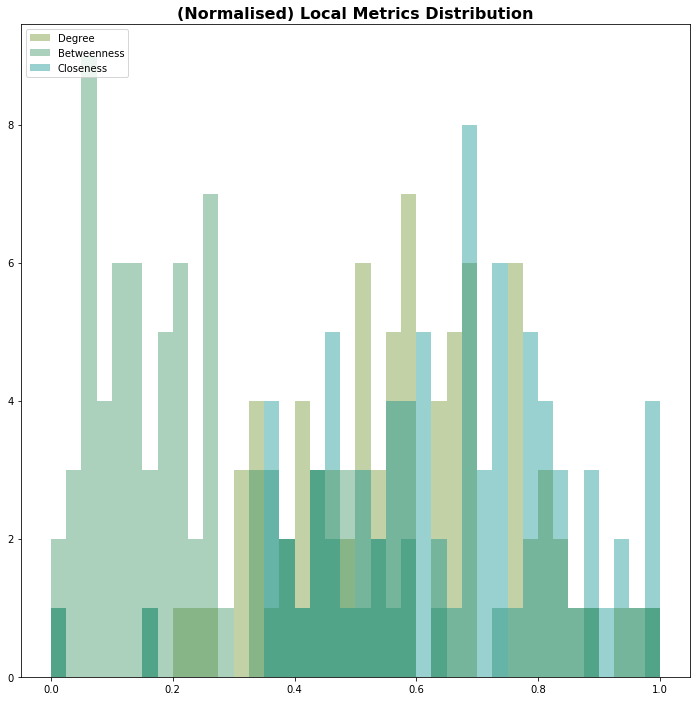

In [11]:
# Part 2: Network Analysis
# essentially calculating centrality measures (try at least one eigenvalue based one)
# degree centrality measure
degree_ctr_total = nx.degree_centrality(G_total)
in_degree_ctr_total = nx.in_degree_centrality(G_total)
out_degree_ctr_total = nx.out_degree_centrality(G_total)

DC_Counter = collections.Counter(degree_ctr_total)

# betweenness centrality measure
betweenness_nodes_ctr_total = nx.betweenness_centrality(G_total) # for nodes

BC_Counter = collections.Counter(betweenness_nodes_ctr_total)

# closeness centrality measure
closeness_ctr_total = nx.closeness_centrality(G_total)

CC_Counter = collections.Counter(closeness_ctr_total)

# Local metrics comparison
plt.figure(figsize=(12,12))
plt.hist([(value - min([value for key, value in DC_Counter.items()])) / (max([value for key, value in DC_Counter.items()]) - min([value for key, value in DC_Counter.items()])) for key, value in DC_Counter.items()], 
           bins = 40, 
           color = 'olivedrab',
           alpha = 0.4,
           histtype = "stepfilled",
           label = 'Degree')
plt.hist([(value - min([value for key, value in BC_Counter.items()])) / (max([value for key, value in BC_Counter.items()]) - min([value for key, value in BC_Counter.items()])) for key, value in BC_Counter.items()], 
           bins = 40, 
           color = 'seagreen',
           alpha = 0.4,
           histtype = "stepfilled", 
           label = 'Betweenness')
plt.hist([(value - min([value for key, value in CC_Counter.items()])) / (max([value for key, value in CC_Counter.items()]) - min([value for key, value in CC_Counter.items()])) for key, value in CC_Counter.items()], 
           bins = 40, 
           color = 'darkcyan', 
           alpha = 0.4,
           histtype = "stepfilled",
           label = 'Closeness')
plt.title('(Normalised) Local Metrics Distribution',
          fontweight="bold",
          fontsize = 16)
plt.legend(loc = 'upper left')
plt.show()

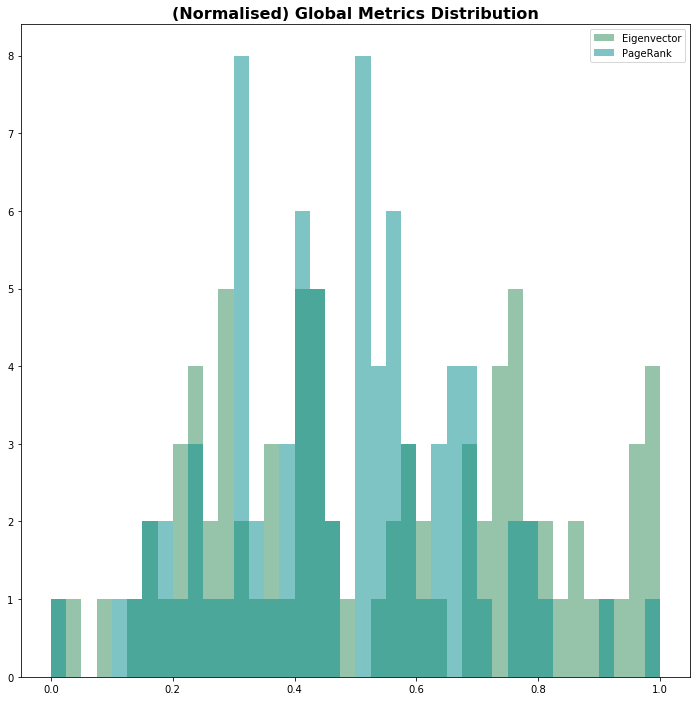

In [10]:
# eigenvector centrality measure
eigen_ctr_total = nx.eigenvector_centrality(G_total)

EC_Counter = collections.Counter(eigen_ctr_total)

# pangerank
pagerank_total = nx.pagerank(G_total)

pgrk_Counter = collections.Counter(pagerank_total)

# Global metrics comparison
plt.figure(figsize=(12,12))
plt.hist([(value - min([value for key, value in EC_Counter.items()])) / (max([value for key, value in EC_Counter.items()]) - min([value for key, value in EC_Counter.items()])) for key, value in EC_Counter.items()], 
           bins = 40, 
           color = 'seagreen',
           alpha = 0.5,
           histtype = "stepfilled",
           label = 'Eigenvector')
plt.hist([(value - min([value for key, value in pgrk_Counter.items()])) / (max([value for key, value in pgrk_Counter.items()]) - min([value for key, value in pgrk_Counter.items()])) for key, value in pgrk_Counter.items()], 
           bins = 40, 
           color = 'darkcyan', 
           alpha = 0.5,
           histtype = "stepfilled",
           label = 'PageRank')
plt.title('(Normalised) Global Metrics Distribution', 
          fontweight = "bold",
          fontsize = 16)
plt.legend(loc = 'upper right')
plt.show()


# clustering coefficients and gaining some insight into the network.  
clustering_coef = nx.clustering(G_total.to_undirected())
avg_clustering_coef = nx.average_clustering(G_total.to_undirected())

# find cliques
cliques_total = list(nx.find_cliques(G_total.to_undirected()))
max_cliques = [i for i in cliques_total if len(i) == max([len(i) for i in cliques_total])]

# active people in main cliques
max_cliques_set = [set(i) for i in max_cliques]
ppl_in_all_max_clique = list(reduce(lambda x, y: x.intersection(y), max_cliques_set))

### QUESTION 2              
##### [10 or 15 points]
**The data HW2_tsp.txt contains latitude and longitude data of 38 cities in a country in Africa (Djibouti). Calculate the distance matrix (use an approximation like here which is quite accurate for short distances; or use packages like haversine or geopy). The x and y-cordinates are the latitude and longitude in decimal form multiplied by 1000. EUC_2D means take these as Cartesian co-ordinates. Can also use haversine treating them as longitude and latitude. You are free to use any other functions you find.**

##### Q2 - PART A
**Plot the latitude and longitude as a scatter plot using a drawing package (some options are: matplotlib basemap toolkit (the most advanced, but also the most difficult to use), geopy, gmplot, plotly …).**

**ANSWER)**             
To implement the above, we use Basemap from matplotlib package. Let us take a look at the code below: 

* First we import the required packages and create the cities dataframe

In [2]:
# IMPORTING THE PACKAGES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from haversine import haversine
from gurobipy import *
from mpl_toolkits.basemap import Basemap
import networkx as nx
%matplotlib inline

# CREATING THE CITIES DATAFRAME
# storing the path of the data file
raw_data = r'https://raw.githubusercontent.com/Karim01982/preparation/master/Autumn_term/Network%20Analytics/HW2/Data/HW2_tsp.txt'
# creating the dataframe
dj_tsp_df = pd.read_table(raw_data, header=None, skiprows=10, sep=" ")
# renaming the columns, and dropping the no.
dj_tsp_df.columns = ['no.','latitude','longitude']
dj_tsp_df = dj_tsp_df[['longitude','latitude']]
# dividing coordinates by 1,000
dj_tsp_df = dj_tsp_df[['longitude','latitude']]/1000
dj_tsp_df.head()

,longitude,latitude
0,42.102500,11.003611
1,42.373889,11.108611
2,42.885833,11.133333
3,42.712500,11.155833
4,42.933333,11.183333


This is how the Cities dataframe looks.                 
                        
Next, we create a numpy array with the distances between cities. To do this, we use the 'Haversine' function from the Haversine package.

In [ ]:
# CREATING NUMPY ARRAY WITH DISTANCES BETWEEN CITIES
# creating an empty numpy array
dj_dist_matrix = np.zeros((len(dj_tsp_df),len(dj_tsp_df)))
# populating the array by calculating distances between provided coordinates using Haversine function
for i in range(len(dj_tsp_df)):
    for j in range(len(dj_tsp_df)):
        dj_dist_matrix[i,j] = haversine((dj_tsp_df['latitude'][i], dj_tsp_df['longitude'][i]),
                                        (dj_tsp_df['latitude'][j], dj_tsp_df['longitude'][j]))


Now, we create variables that hold the value of Latitude and Longitude for cities and then use it to plot the graph.

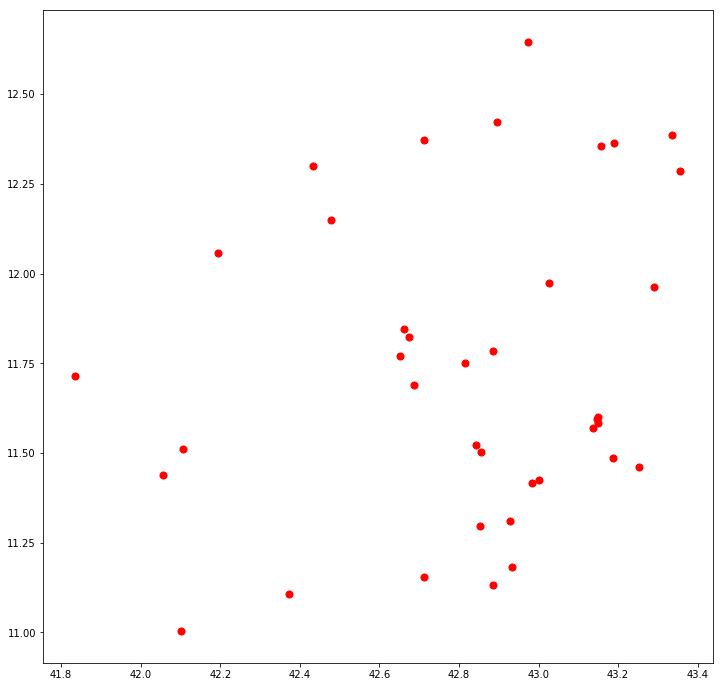

In [16]:
# CREATING VARIABLES THAT STORE LATITUDE AND LONGITUDE VALUES
lat = dj_tsp_df['latitude'].values.tolist()
long = dj_tsp_df['longitude'].values.tolist()

# PLOTTING THE POINTS ON GRAPH
plt.figure(figsize=(12,12))
plt.scatter(long, lat, s=50, color='red')

We see from the above graph, that the graph obtained is same as the one provided for reference!               
However, this doesnt really make much sense as it doesnt show us the location on the actual map of Djibouti. To get the points of the cities on the map, we do the following:
* Use an image service **ESRI_Imagery_World_2D** with EPSG value of 4713 under Basemap. This gives us the map of Djibouti
* After obtaining the map, we plot the points of the cities, and obtain a more meaningful plot. 

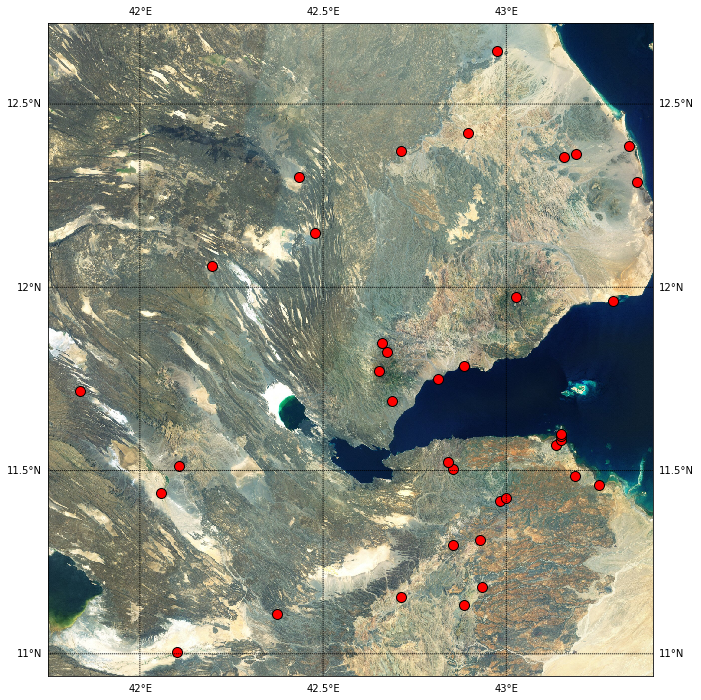

In [12]:
# PLOTTING THE POINTS ON THE MAP
# creating variables for latitude and longitude lines
parallels = np.arange(0,40, 0.5)
meridians = np.arange(10,50, 0.5)
# creating the map using an image service
plt.figure(figsize=(12,12))
dj_map = Basemap(llcrnrlon=41.75, llcrnrlat=10.94, urcrnrlon=43.4, urcrnrlat=12.72, epsg=4713)
dj_map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= False)
# plotting the points
for i in list(range(len(dj_tsp_df))):
    x, y = dj_map(float(long[i]), float(lat[i]))
    dj_map.plot(x, y, marker = 'o', markeredgecolor='black', markersize=10, color = 'red')
# drawing latitude and longitude lines
dj_map.drawparallels(parallels,labels=[True,True,True,True])
dj_map.drawmeridians(meridians,labels=[True,True,True,True])
plt.show()

We now have a much better plot on the map over the area of Djibouti. This shows us a lot better picture regarding the distance between cities and adds meaning to the plot.                
                         

##### Q2 - PART C
**[Challenge problem., 10 points]**                    
                    
**Connect with the Python interface of Gurobi and find an optimal tour using the sub-tour elimination integer programming formulation we did in class. You cannot generate all the sub-tour elimination constraints at once (too many). Instead,                
i. Start with a problem with only the degree =2 constraints.                      
ii. Check the resulting solution for sub-tours. If there is a sub-tour, add the sub-tour elimination constraints corresponding to a cut defined by the sub-tour (i.e. you are eliminating that sub-tour in the next round).                  
iii. Repeat till you find a tour (in which case, it is optimal). Make sure you do not discard the solution from the previous round, but start from what you had found.**

**ANSWER)**                      
Let us break-down the problem and first approach the problem with only degree=2 constraints.

In [17]:
# ==================== Part (i) ====================
# USING ONLY DEGREE = 2 CONSTRAINTS

# defining variables for use
n = len(dj_tsp_df)
lat_long = dj_tsp_df.values.tolist()

# CREATING CITIES DICTIONARY
index = list(range(0, n))
cities_dict = {k: v for k, v in zip(index, lat_long)}

# CREATING A GUROBI MODEL
mod1 = Model()

# CREATE VARIABLES    
vars = {}
for i in range(n):
   for j in range(i+1):
     vars[i,j] = mod1.addVar(obj=dj_dist_matrix[i,j], vtype=GRB.BINARY,
                          name='e'+str(i)+'_'+str(j))
     vars[j,i] = vars[i,j]
   mod1.update()
   
# ADDING DEGREE CONSTRAINTS
for i in range(n):
  mod1.addConstr(quicksum(vars[i,j] for j in range(n)) == 2)
  vars[i,i].ub = 0

# OPTIMIZING THE MODEL
mod1.optimize()

# GETTING SELECTED NODES FROM THE SOLUTION
solution1 = mod1.getAttr('x', vars)
selected1 = [(i,j) for i in range(n) for j in range(n) if solution1[i,j] > 0.5]

# CONVERTING SELECTED NODES TO A LIST
for i in range(len(selected1)):
    selected1[i] = list(selected1[i])

# CREATING EDGES TO PLOT
# creating a pandas dataframe of the distance matrix
dj_df1 = pd.DataFrame(dj_dist_matrix)
# creating a edges dataframe 
edges = dj_df1.stack().reset_index()
edges.columns = ['node1', 'node2','weight']

Optimize a model with 38 rows, 741 columns and 1444 nonzeros
Variable types: 0 continuous, 741 integer (741 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 3323.9530610
Presolve removed 0 rows and 38 columns
Presolve time: 0.00s
Presolved: 38 rows, 703 columns, 1406 nonzeros
Variable types: 0 continuous, 703 integer (703 binary)

Root relaxation: objective 6.993573e+02, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  699.35728    0   10 3323.95306  699.35728  79.0%     -    0s
H    0     0                     822.5452792  699.35728  15.0%     -    0s
H    0     0                     700.6239141  699.35728  0.18%     -    0s
     0     0     cutoff    0       700.62391  700.62391  0.00%    

Let us take a look at the sub-tours that we have generated by putting only degree = 2 constraints.

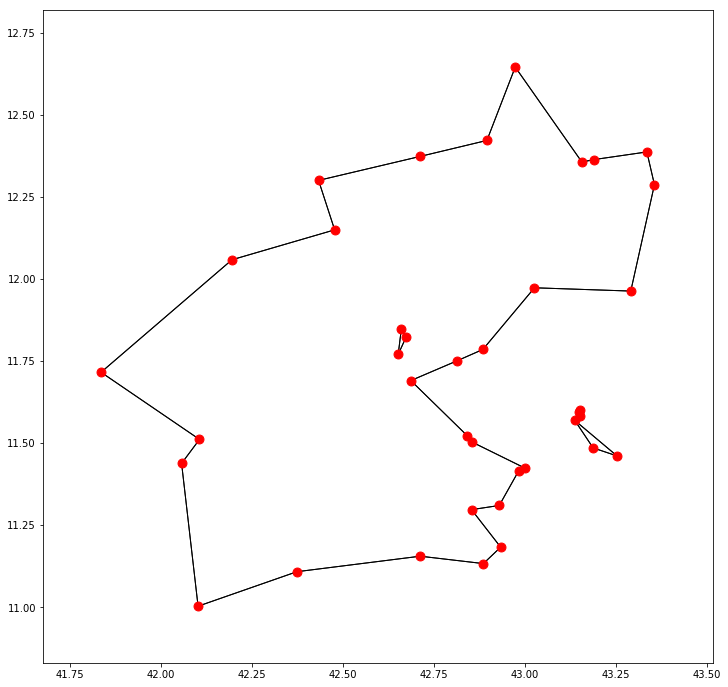

In [18]:
# PLOTTING THE GRAPH WITH SUBTOURS
# building the graph
dj_G1 = nx.from_pandas_dataframe(edges, 'node1', 'node2')
# adding nodes and edges to the plot 
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(dj_G1, with_labels = True, node_size = 80, font_size = 8, pos=cities_dict, color='red')
nx.draw_networkx_edges(dj_G1, pos=cities_dict, edgelist = selected1)

We can note from the plot above that there are 3 subtours generated, one large and two rather smaller ones. These would be removed once we add the subtour elimination constraints.

In [19]:
# ==================== Part (ii) and (iii) ====================
# ADDING SUBTOUR ELIMINATION CONSTRAINTS

# FUNCTION TO ELIMINATE THE SUB-TOURS
def subtourelim(model, where):    
    if where == GRB.callback.MIPSOL:
        selected_edges = []
        
        # creating a list of edges selected in the solution
        for i in range(len(dj_dist_matrix)):
            solution_sub = model.cbGetSolution([model._vars[i,j] for j in range(len(dj_dist_matrix))])
            selected_edges += [(i,j) for j in range(len(dj_dist_matrix)) if solution_sub[j] > 0.5]
    
        # finding the shortest cycle in the selected edge list
        tour = subtour(selected_edges)
        if len(tour) < len(dj_dist_matrix):
            # adding sub-tour elimination constraint
            expr = 0
            for i in range(len(tour)):
                for j in range(i+1, len(tour)):
                    expr += model._vars[tour[i], tour[j]]
            model.cbLazy(expr <= len(tour)-1)


# FUNCTION TO FIND THE SHORTEST SUB-TOUR GIVEN A LIST OF TOURS
def subtour(edges):
    visited = [False]*len(dj_dist_matrix)
    cycles = []
    lengths = []
    selected = [[] for i in range(len(dj_dist_matrix))]
    for x,y in edges:
        selected[x].append(y)
    while True:
        current = visited.index(False)
        thiscycle = [current]
        while True:
            visited[current] = True
            neighbors = [x for x in selected[current] if not visited[x]]
            if len(neighbors) == 0:
                break
            current = neighbors[0]
            thiscycle.append(current)
        cycles.append(thiscycle)
        lengths.append(len(thiscycle))
        if sum(lengths) == len(dj_dist_matrix):
            break
    return cycles[lengths.index(min(lengths))]

# CREATING A GUROBI MODEL
mod2 = Model()

# CREATING VARIABLES
vars = {}
for i in range(len(dj_dist_matrix)):
    for j in range(i+1):
        vars[i,j] = mod2.addVar(obj=dj_dist_matrix[i,j], vtype=GRB.BINARY, name='e'+str(i)+'_'+str(j))
        vars[j,i] = vars[i,j]
    mod2.update()

# ADDING DEGREE-2 CONSTRAINTS AND FORBIDDING LOOPS
for i in range(len(dj_dist_matrix)):
    mod2.addConstr(quicksum(vars[i,j] for j in range(len(dj_dist_matrix))) == 2)
    vars[i,i].ub = 0
mod2.update()

# OPTIMIZING THE MODEL
mod2._vars = vars
mod2.params.LazyConstraints = 1
mod2.optimize(subtourelim)

# GETTING SELECTED NODES FROM THE SOLUTION
solution = mod2.getAttr('x', vars) # producing list of solutions
selected_nodes = [(i,j) for i in range(len(dj_dist_matrix)) for j in range(len(dj_dist_matrix)) if solution[i,j] > 0.5] #producing list of selected nodes from the solutions

Changed value of parameter LazyConstraints to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Optimize a model with 38 rows, 741 columns and 1444 nonzeros
Variable types: 0 continuous, 741 integer (741 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [6e-01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve removed 0 rows and 38 columns
Presolve time: 0.00s
Presolved: 38 rows, 703 columns, 1406 nonzeros
Variable types: 0 continuous, 703 integer (703 binary)

Root relaxation: objective 6.993573e+02, 49 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  699.35728    0   10          -  699.35728      -     -    0s
H    0     0                     854.9674757  699.35728  18.2%     -    0s
H    0     0                     851.7101507  699.35728  17.9%     -    0s
*    0     0               0

Thus we see that we have found an optimal solution for the travelling salesman problem.

##### Q2 - PART D 
**Plot the resulting tour on the scatter plot**

**ANSWER)**                
Let us plot the optimal tour obtained.

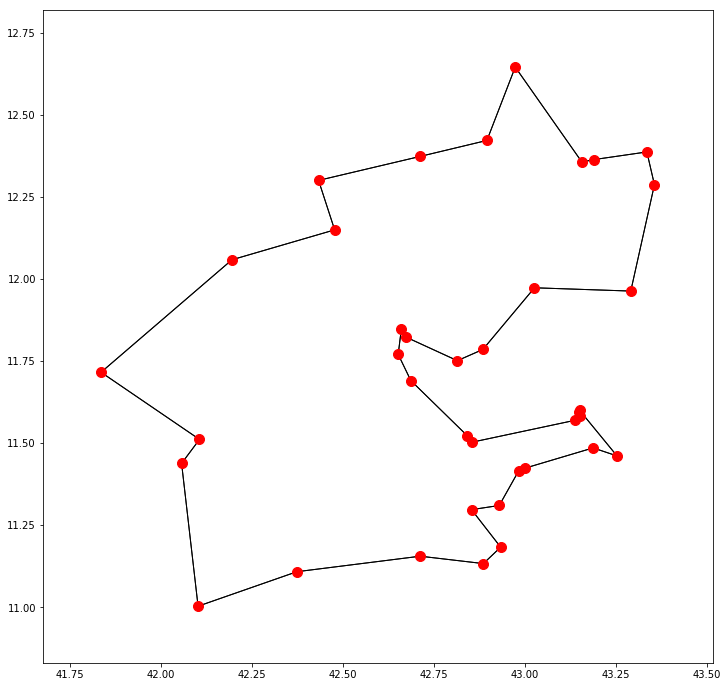

In [20]:
# PLOTTING THE TRAVELLING SALESMAN TOUR ON GRAPH

# converting selected nodes to a list
selected_nodes_graph = selected_nodes
for i in range(len(selected_nodes_graph)):
    selected_nodes_graph[i] = list(selected_nodes_graph[i])

# CREATING EDGES TO PLOT
# creating a pandas dataframe of the distance matrix
dj_df2 = pd.DataFrame(dj_dist_matrix)
# creating a pandas dataframe of the distance matrix
edges_tsp = dj_df2.stack().reset_index()
edges_tsp.columns = ['node1', 'node2','weight']

# PLOTTING THE GRAPH
# building the graph
dj_G_tsp =nx.from_pandas_dataframe(edges_tsp, 'node1', 'node2')
# adding nodes and edges to the graph
plt.figure(figsize=(12,12))
nx.draw_networkx_nodes(dj_G_tsp, with_labels = True, node_size = 100, font_size = 8, pos=cities_dict)
nx.draw_networkx_edges(dj_G_tsp, pos=cities_dict, edgelist = selected_nodes_graph)

We see that the graph obtained is exactly the same as the one provided as the reference solution. Therefore, this is the optimal Travelling Salesman route.                      
                      
Let us plot this on the map of Djibouti to add more meaning to the tour.

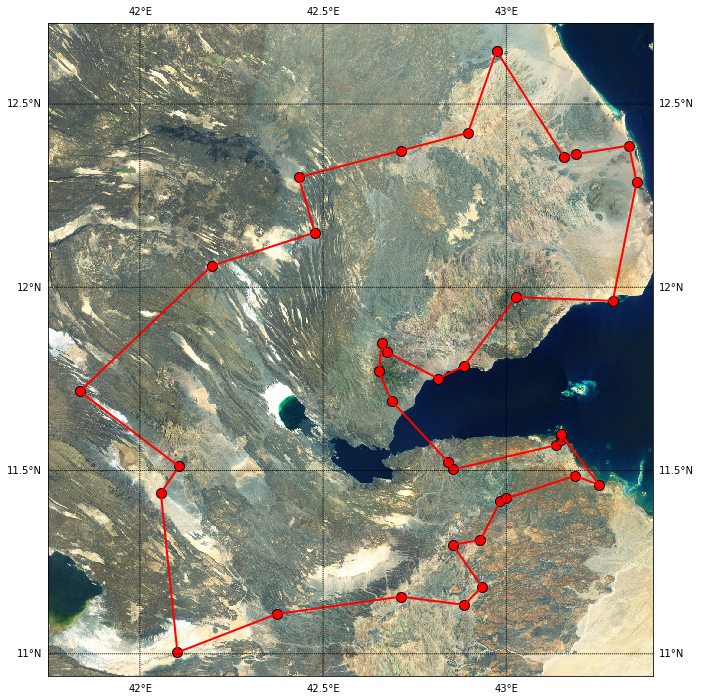

In [21]:
# CREATING THE TRAVELLING SALESMAN TOUR ON DJIBOUTI MAP
# setting size of the map
plt.figure(figsize=(12,12))
# using imageservice for a 'better' graph
dj_tsp_map = Basemap(llcrnrlon=41.75, llcrnrlat=10.94, urcrnrlon=43.4, urcrnrlat=12.72, epsg=4713)
dj_tsp_map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2000, verbose= False)
# assigning X & Y co-ordinates for plotting on the map
x, y = dj_tsp_map(dj_tsp_df['longitude'].values, dj_tsp_df['latitude'].values)
# looping thru the edges to be displayed
for n in range (len(selected_nodes)):
    if selected_nodes[n][0] < selected_nodes[n][1]:
        node1 = selected_nodes[n][0]
        node2 = selected_nodes[n][1]
        dj_tsp_map.drawgreatcircle(dj_tsp_df['longitude'][node1], dj_tsp_df['latitude'][node1],
                                   dj_tsp_df['longitude'][node2], dj_tsp_df['latitude'][node2],
                                   linewidth = 2,color = 'r')
# creating a scatter plot
dj_tsp_map.scatter(x, y, s=100, edgecolor='black', marker = 'o', color = 'r')
# labels = [left,right,top,bottom]
dj_tsp_map.drawparallels(parallels,labels=[True,True,True,True])
dj_tsp_map.drawmeridians(meridians,labels=[True,True,True,True])
plt.show()

The final tour of the salesman would be the following.

In [10]:
# PRINTING THE SEQUENCE OF NODES OF THE TSP TOUR
tsp_tour = [0]
k = 0
while k < (len(selected_nodes)/2 - 1):
    for n in range(len(selected_nodes)):
        if (selected_nodes[n][0] == tsp_tour[-1] and selected_nodes[n][1] not in tsp_tour):
            tsp_tour.append(selected_nodes[n][1])
            k += 1
tsp_tour.append(0)
print(tsp_tour)

[0, 1, 3, 2, 4, 5, 6, 7, 8, 11, 10, 18, 17, 16, 15, 12, 14, 19, 22, 25, 24, 21, 23, 27, 26, 30, 35, 33, 32, 37, 36, 34, 31, 29, 28, 20, 13, 9, 0]


## THEORY

### QUESTION 3
##### [5 Points]
**Show that the greedy algorithm works in finding the optimal (min or max) weighted spanning tree. i.e., you have to show            
(a) it terminates in finite time---better if you can show polynomial time              
(b) the tree that it finds is an optimal tree.**

**ANSWER)**              
A tree is an undirected graph that is connected and acyclic. This graph with $n$ nodes has $n-1$ edges and is characterized by having a unique path between any pair of nodes on the tree. A spanning tree of an undirected graph $G$ is a subset of the graph’s edges that form a tree containing (spanning) all nodes. 
The optimal min/max spanning tree could be found using the naïve algorithm which consists of checking all possible spanning trees in a graph. However, if we have n nodes there are $2^n$ possible spanning trees thus the algorithm has an exponential running time. 

Another alternative for finding the min/max spanning tree is through a greedy algorithm (such as Prim’s or Kruskal algorithms). A greedy algorithm consists of picking up the next best solution while maintaining feasibility. In other words, it works in finding the next best local choice with the hope of finding the global optimum. 
In the case of finding the optimal spanning tree, the greedy algorithm is the best approach as it does not only find the local best solution but gives as well a global optimal solution. This can be shown by the cut property which indicates that in any cut $(S, V-S)$ in a graph $G$, any least weight crossing edge (for a min case) such as edge e incident to nodes $u$ and $v$ with $u \in S$ and$ V \notin S$ is in some minimum spanning tree of graph $G$. This can be proven as follows:
Consider a minimum spanning tree $T$ of $G$ where $e$ is not in $T$ and has a path between nodes $u$ and $v$. Another minimum spanning tree $T’$ that contains edge e is constructed based on the previous tree $T$.  Since $T$  has a already unique path between u and $v$  we cannot add edge $e$ to $T$ as it creates a cycle (tree should be acyclic). Thus, we assume that there is another edge e’ that connect the cut to T. Thus, for T’ we would have
 $T'=T∪\{e\}-\{e'\}$and weight $(T’) =$ Weight $(T) + W(e) – W(e’)$.  Since e is the lowest edge then the weight of T’  is less than the weight of $T$.  Thus, if T is a minimum spanning tree then $T’ =T$ and $W(e) = W(e’)$ proving that T’ is also an MST where the least weight crossing edge is chosen (this can also be shown with a maximum spanning tree taking the highest weight crossing edge). 

Both Prim’s and Kruskal are based on the cut property to find the min/max spanning tree. The Prim’s algorithm adds edges that have the lowest/highest weight to gradually build up the spanning tree.  In other words, at every step, we need to find a cut and select the lowest/highest weight edge and include it in an empty set containing the spanning tree. This algorithm is very similar to Djikstra as it uses also a priority queue to find the lowest/highest edge and has a running time depending on the type of priority queue used.  A running time of $O (V^2)$ using an array priority queue. This running time is enhanced by using a binary heap and adjacency data structure with a running time of $O(E log V)$ with E for edges and V for vertex. 
The Kruskal’s algorithm is another approach to solve the min/max spanning tree problem but starts with the globally lowest / highest weight edge where we repeatedly add to the empty set the next lightest/heavier edge that does not produce a cycle. Sorting of the edges in this algorithm has a total running time of $O (E log E)$. After sorting of the edges, we need to iterate through all edges and apply the union and find operations with a running time of $2E·T(Find)+V·T(Union) = O((E+V)log V) = O(E log V)$
Thus, the total running time is $O (E log E)$ or $O (E log V)$ which are similar. This running time can be also improved by using a randomized algorithm for minimum cut. 

**References:**                   
1) Massachusetts Institute of Technology. (2015). Lecture 12: Greedy Algorithms and Minimum Spanning Tre. Spring Lecture 1[online]. Available at: https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-046j-design-and-analysis-of-algorithms-spring-2015/lecture-notes/MIT6_046JS15_writtenlec12.pdf [Accessed 2 Dec 2017].


2) S Dasgupta, C.H. Papadimitriou, and U.V. Vazirani. Greedy Algorithms. P. 143 to 151. Available at : file:///C:/Users/Joanna%20Andari/AppData/Local/Packages/Microsoft.MicrosoftEdge_8wekyb3d8bbwe/TempState/Downloads/greedy.pdf     [Accessed 2 Dec 2017].


### QUESTION 4
##### [5 Points]
##### Q4- PART A 
**Formulate the problem of sending the maximum amount of flow on the following network (the edges have capacities as shown) as a linear program**
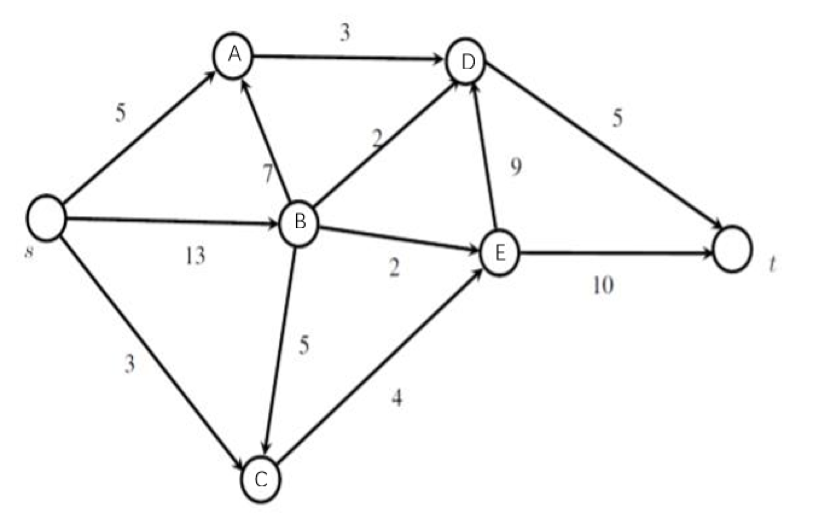

**ANSWER)**                
The directed weighted graph consists of 7 nodes and 10 edges, to find the maximum flow of the directed graph, a linear programme can be formulated.

Knowing that the each weighted edge represent the maximum allowed capacity of flow between each pair of nodes, the following capacity constraints can be formulated:

<center>
0≤Xsa≤5  

0≤Xsb≤13  

0≤Xsc≤3  

0≤Xad≤3  

0≤Xba≤7  

0≤Xbc≤5  

0≤Xbd≤2  

0≤Xbe≤2  

0≤Xce≤4  

0≤Xed≤9  

0≤Xet≤10  

0≤Xdt≤5  
</center >

-Where for symbol “Xij” means the edge connecting nodes “I” and “j”, so “Xsa” means the edge (capacity) between node S and node A.

Since the graph is a directed graph, for each node, the outgoing edge carries weights of negative values and incident edge carries weight of positive values.                         
Thus, constraints have to be formulated to regulate the directions of flow:
<center>
Node S: 						 -Xsc-Xsa-Xsb=-f</center>

<center>Node A:						 Xsa+Xba-Xad=0</center>

<center>Node B: 						 Xsb-Xba-Xbc-Xbe-Xbd=0</center>

<center>Node C: 						 Xsc+Xbc-Xce=0</center>

<center>Node D: 						 Xab+Xbd+Xed-Xdt=0</center>

<center>Node E:						 Xbe+Xce-Xed-Xet=0</center>

<center>Node T: 						 Xdt+Xet=f</center>

-Symbol “f” refers to the total amount of flow exiting the source (node S) and entering the sink (node T).


The final formulated linear programme aiming to find the maximum flow of the network is displayed below:

Objective function:

Max: |f|

Subject to: 

<center>
-Xsc-Xsa-Xsb=-f  

Xsa+Xba-Xad=0  

Xsb-Xba-Xbc-Xbe-Xbd=0  

Xsc+Xbc-Xce=0  

Xab+Xbd+Xed-Xdt=0  

Xbe+Xce-Xed-Xet=0  

Xdt+Xet=f  

0≤Xsa≤5  

0≤Xsb≤13  

0≤Xsc≤3  

0≤Xad≤3  

0≤Xba≤7  

0≤Xbc≤5  

0≤Xbd≤2  

0≤Xbe≤2  

0≤Xce≤4  

0≤Xed≤9  

0≤Xet≤10  

0≤Xdt≤5  

</center>

##### Q4 - PART B 
**Formulate the dual of the linear program as well.**

**ANSWER)**                   
The dual of a maximum flow problem would be a Max-flow min-cut problem, the primal problem is the maximisation of flow, and the dual problem would give the results as the minimum capacity of a cut that separates a network into two disjoint sets, which means the results of the dual problem gives a series of edges with minimum weight compare to other possible cuts.

The dual problem of part a) can be expressed as to minimise$\sum_{u,v \in E}c_{uv}X_{uv}$ which is the sum of the product of multiplication between the capacity of every edge $C_{uv}$ and binary variable of all edges $X_{uv}$. $X_{uv}$ means the edge connecting node u and v, $X_{uv}$=1 if the cut consists of the edge between node u, v, and $X_{uv}=0 $ otherwise. Cuv means the maximum capacity of edge between node u and v. 

Knowing the graph is still directed after the cut but nodes would belong to different sets, thus, binary variables are used to find the optimal location of nodes, for example, if node s is in the set S, binary variable $P_s$would equal to 1, if node s is in set T, $P_s=0$.

the following constraints for each edge and node will be formulated:  

<center>  
State binary variable:			    Ps-Pt≥1  
Edge SA:							Xsa-Ps+Pa≥0  
Edge SB:							Xsb-Ps+Pb≥0  
Edge SC:							Xsc-Ps+Pc≥0  
Edge AD:							Xad-Pa+Pd≥0  
Edge BA:							Xba-Pb+Pa≥0  
Edge BC:							Xbc-Pb+Pc≥0  
Edge BD:							Xbd-Pb+Pd≥0  
Edge BE:							Xbe-Pb+Pe≥0  
Edge CE:							Xce-Pc+Pe≥0  
Edge DE:							Xdt-Pd+Pt≥0  
Edge ED:							Xed-Pe+Pd≥0  
Edge ET:							Xet-Pe+Pt≥0 


The final formulated dual linear programme is displayed below.  

Minimise:  

<center>
5Xsa+13Xsb+3Xsc+3Xad+7Xba+5Xbc+2Xbd+2Xbe+4Xce+5Xdt+9Xed+10Xet



Subject to:  
<center>
Xsa-Ps+Pa≥0  
Xsb-Ps+Pb≥0  
Xsc-Ps+Pc≥0  
Xad-Pa+Pd≥0  
Xba-Pb+Pa≥0  
Xbc-Pb+Pc≥0  
Xbd-Pb+Pd≥0  
Xbe-Pb+Pe≥0  
Xce-Pc+Pe≥0  
Xdt-Pd+Pt≥0  
Xed-Pe+Pd≥0  
Xet-Pe+Pt≥0  
Ps-Pt≥1


##### Q4 - PART C 
**Solve using a linear programming solver (say Excel).**

**ANSWER)**                    
Excel is used as a linear programing solver and the above objective function along with all the constraints have been solved:  

Linear optimization of part a)
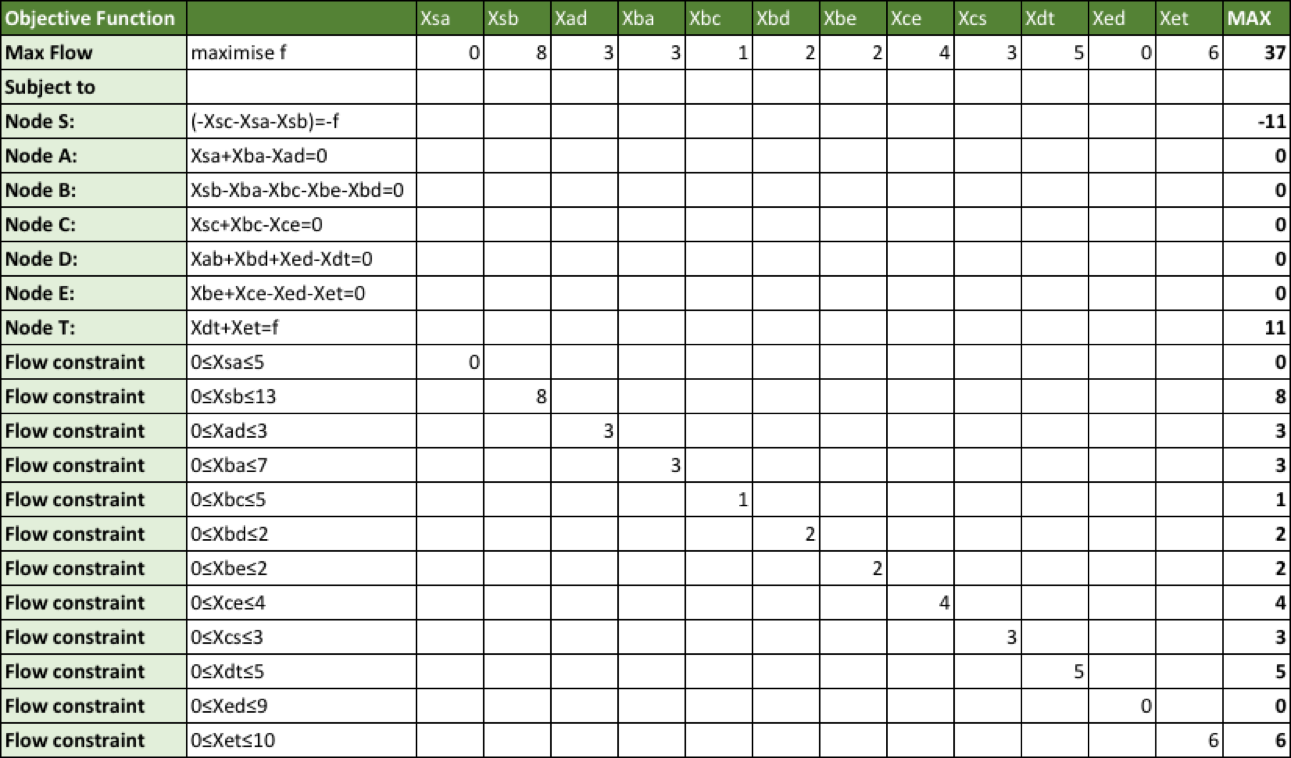


Linear optimization of part b)
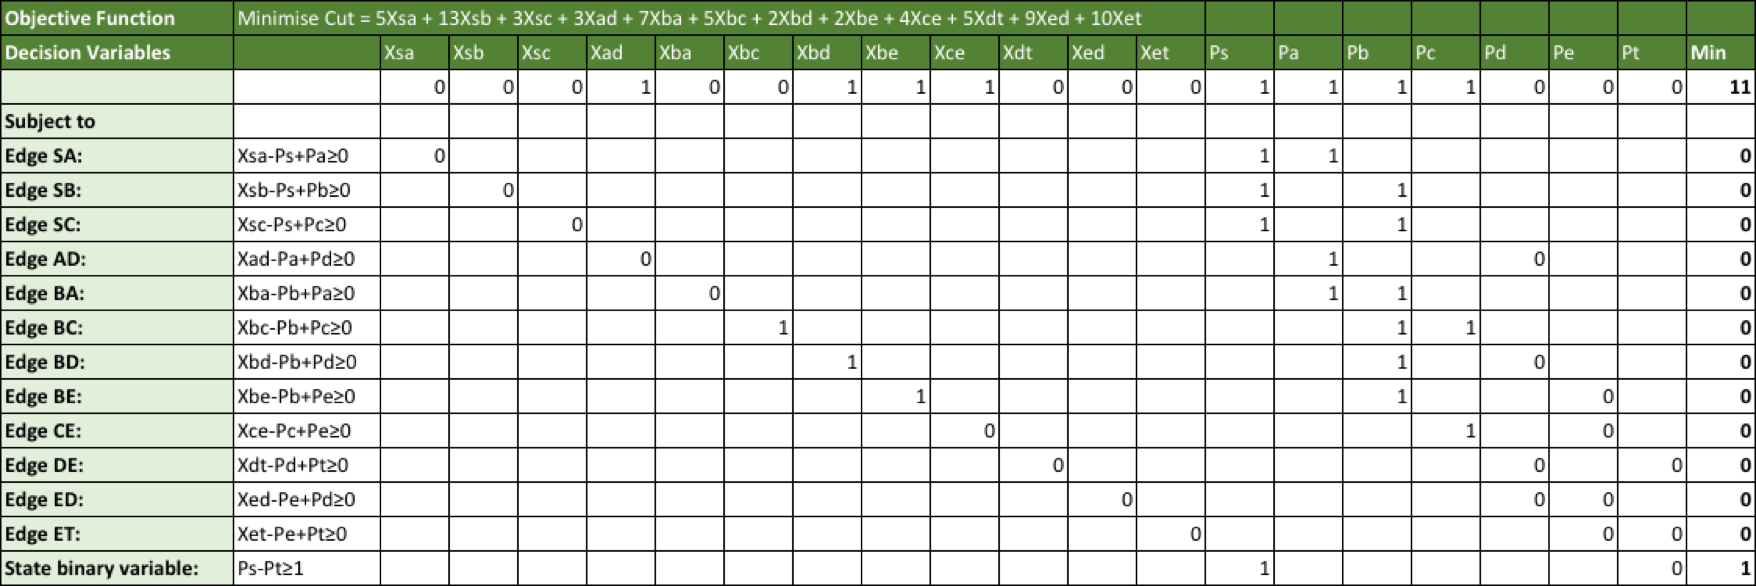

The output of the maximized flow is $|f|=11$.
The minimised cut have a capacity of 11, which equals to the maximum flow, the cut disjoints the graph into two separate sets of nodes: set $S$ and set $T$ (where node $s$ is in set $S$ and node $t$ is in set $T$), and the linear model of dual problem suggests the set $S$ consists node $s, a, b,$ and $c$. 


##### Q4 - PART D 
**From the dual values (i.e. the shadow prices) of the linear program corresponding to the optimal extreme point (basic feasible) solution, find a minimum-capacity cut.**

**ANSWER)**                  
As mentioned in part b) and part c), by solving the dual of maximum-flow linear programme, the minimum capacity of cut can be obtained. 

Knowing a cut s-t separates graph into disjoint sets $S$ and $T$ with node $s$ in $S$ and node $t$ in $T$, and nodes in $S$ and nodes in $T$ do not include each other. 

The capacity of the cut,$Cap(S,T)$ means the sum of the capacities from $S$ to $T$, and the minimised capacity of the cut can be obtained from the optimal dual value, and $Cap(S,T)=11$, which equals to the maximum flow in part a) of the question. By setting edges and nodes as binary variables, the results of linear model implies that the minimised capacity of the cut consists of edges $AD, BD, BE,$ and $CE$ (as illustrated in dotted line in the following pitcure, set S consists of nodes $s, a, b$, and $c$.

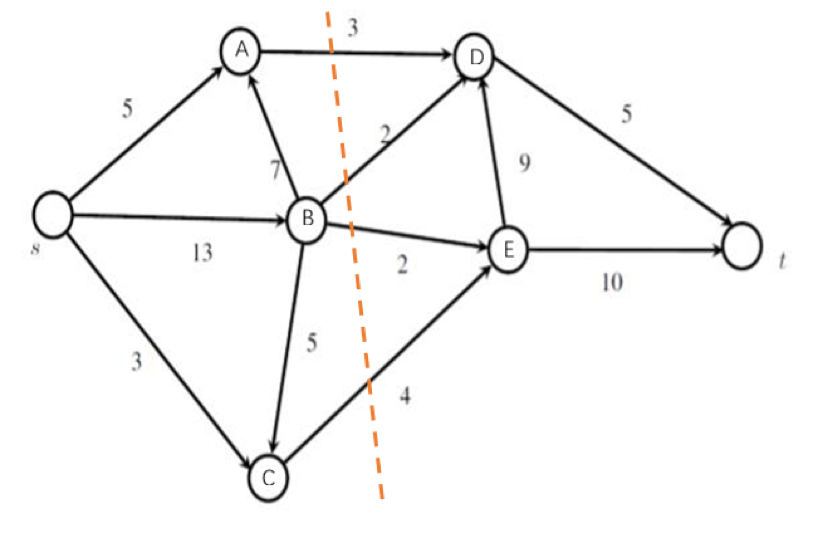